In [1]:
#加载
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib.use('TkAgg')
%matplotlib inline

In [2]:
#数据处理
df=pd.read_csv('CRIME_EDITED.csv')
df.columns=df.columns.str.strip()
#df.columns=df.columns.str.replace(' ','_')
#print(df.shape)
#print(df.isnull().sum())

#处理时间
#temp=pd.to_datetime(df['Date Occurred'])
#df['Date Occurred']=temp
#df['month']=temp.dt.month
#df['day']=temp.dt.day
#df['year']=temp.dt.year
#df.sort_values(by='Date Occurred',ascending=False,inplace=True)
#df[['Date Occurred','year','month','day']].reset_index()

lat=[]
lon=[]
df['location_1']=df['Location'].str.strip('()')

for row in df['location_1']:
    try:
        lat.append(row.split(',')[0])
        lon.append(row.split(',')[1])
    except:
        lat.append(np,nan)
        lon.append(np,nan)

df['lat']=lat
df['lon']=lon

df.head()

,Date Occurred,DR Number,Date Reported,Date Occurred.1,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,...,Crime Code 4,Address,Cross Street,Location,month,day,year,location_1,lat,lon
0,2015-11-03,151521112,11/04/2015,2015-11-03,2230,NaN,N Hollywood,1555,330,BURGLARY FROM VEHICLE,...,NaN,11100 CAMARILLO ST,NaN,"(34.1577, -118.3727)",11,3,2015,"34.1577, -118.3727",34.1577,-118.3727
1,2015-10-30,151521113,11/04/2015,2015-10-30,200,NaN,N Hollywood,1548,330,BURGLARY FROM VEHICLE,...,NaN,11100 CHANDLER BL,NaN,"(34.1681, -118.3724)",10,30,2015,"34.1681, -118.3724",34.1681,-118.3724
2,2015-11-04,151521117,11/04/2015,2015-11-04,1400,NaN,N Hollywood,1506,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,NaN,7300 BAKMAN AV,NaN,"(34.203, -118.3779)",11,4,2015,"34.203, -118.3779",34.203,-118.3779
3,2015-04-28,151521121,11/04/2015,2015-04-28,2125,NaN,N Hollywood,1567,121,"RAPE, FORCIBLE",...,NaN,10700 LANDALE ST,NaN,"(34.1513, -118.3642)",4,28,2015,"34.1513, -118.3642",34.1513,-118.3642
4,2015-10-27,151521123,11/05/2015,2015-10-27,600,NaN,N Hollywood,1515,354,THEFT OF IDENTITY,...,NaN,11700 LEMAY ST,NaN,"(34.1912, -118.3891)",10,27,2015,"34.1912, -118.3891",34.1912,-118.3891


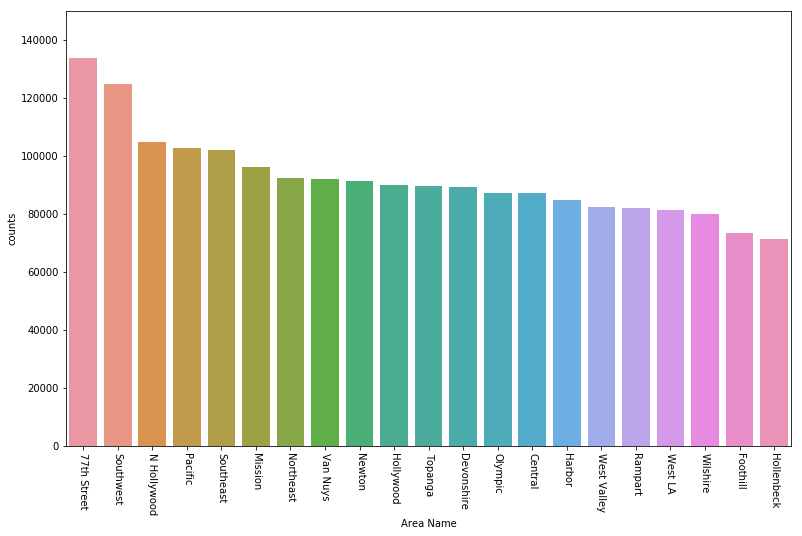

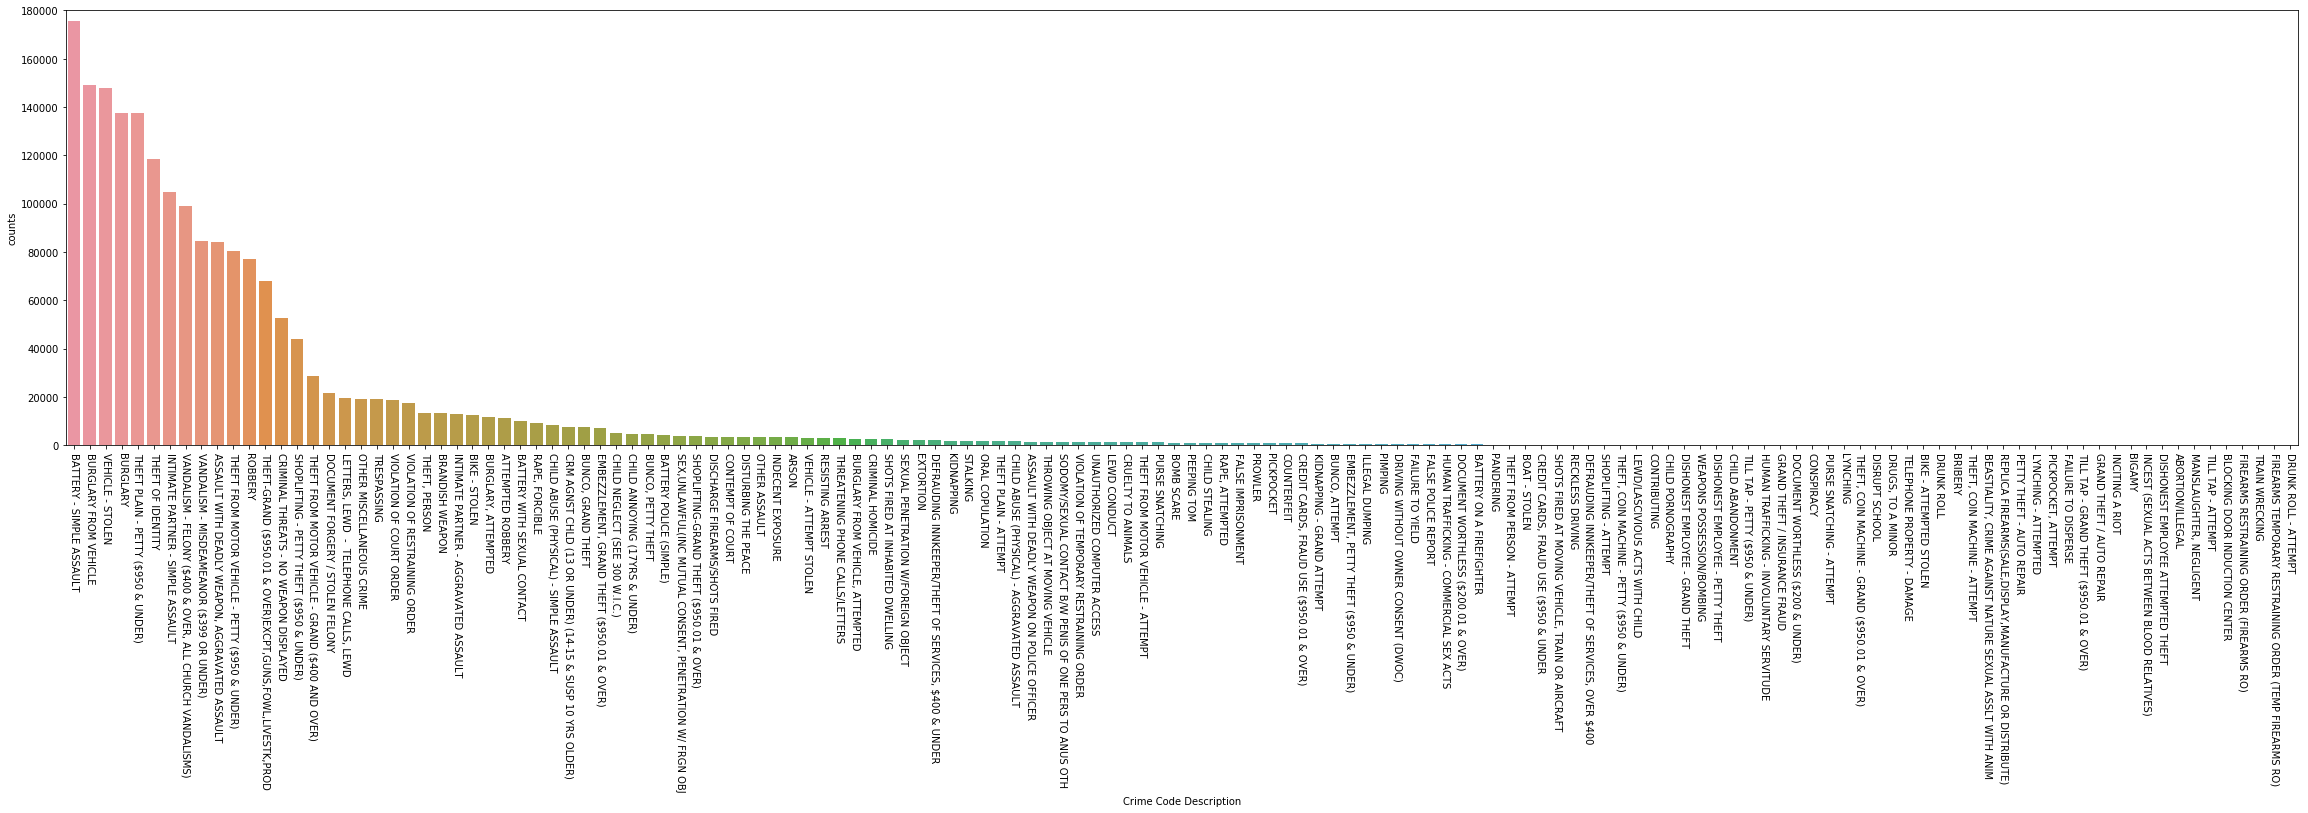

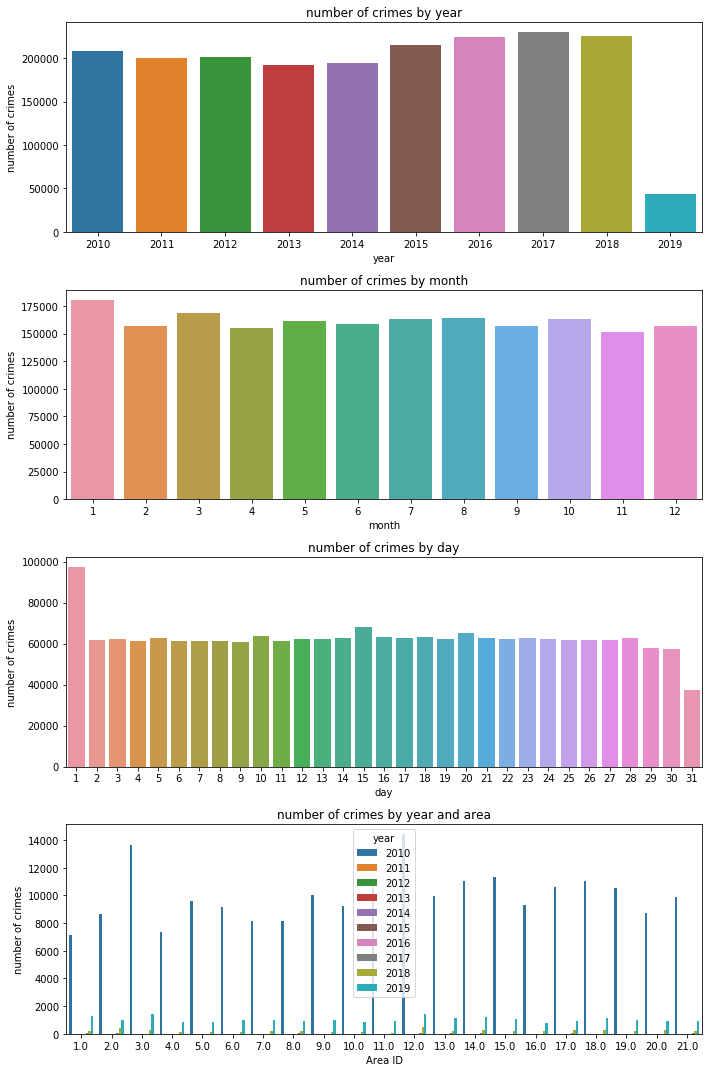

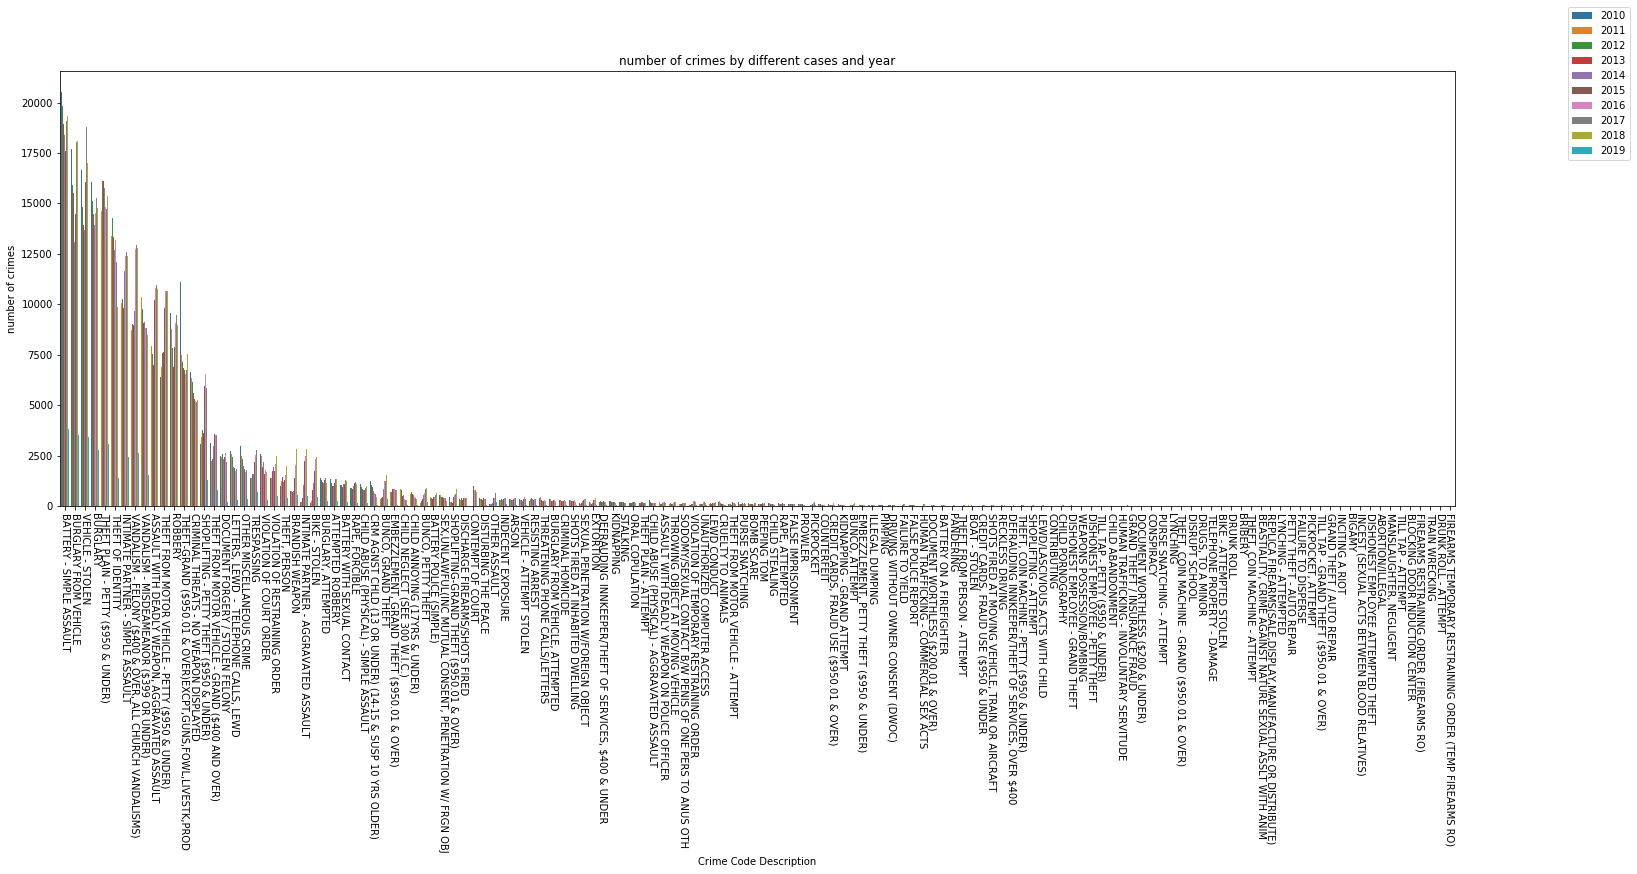

In [3]:
#分组绘图
crime_area=pd.DataFrame(df.groupby('Area Name').size().sort_values(ascending=False).rename('counts').reset_index())
crime_count=pd.DataFrame(df.groupby('Crime Code Description').size().sort_values(ascending=False).rename('counts').reset_index())
#print(crime_area.head(20))
#print(crime_count.head(20))
crime_area=crime_area[['Area Name','counts']]
f,ax=plt.subplots(figsize=(13,8))
fig=sns.barplot(x='Area Name',y='counts',data=crime_area)
fig.axis(ymin=0,ymax=150000)
plt.xticks(rotation=-90)

crime_count=crime_count[['Crime Code Description','counts']]
f,ax=plt.subplots(figsize=(40,8))
fig=sns.barplot(x='Crime Code Description',y='counts',data=crime_count)
fig.axis(ymin=0,ymax=180000)
plt.xticks(rotation=-90)

#根据地区和时间绘图
fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(10,15))

sns.countplot(x='year',data=df,ax=ax1)
ax1.set_ylabel('number of crimes')
ax1.set_title('number of crimes by year')

sns.countplot(x='month',data=df,ax=ax2)
ax2.set_ylabel('number of crimes')
ax2.set_title('number of crimes by month')

sns.countplot(x='day',data=df,ax=ax3)
ax3.set_ylabel('number of crimes')
ax3.set_title('number of crimes by day')

sns.countplot(x='Area ID',hue='year',data=df,ax=ax4)
ax4.set_ylabel('number of crimes')
ax4.set_title('number of crimes by year and area')

fig.tight_layout()

#根据种类和时间作图
fig2,ax5=plt.subplots(figsize=(25,8))
index_order=df['Crime Code Description'].value_counts().index
sns.countplot(x='Crime Code Description',hue='year',data=df,order=index_order,ax=ax5)
ax5.set_ylabel('number of crimes')
ax5.set_title('number of crimes by different cases and year')
ax5.set_xticklabels(labels=index_order,rotation=-90)
ax5.legend(bbox_to_anchor=(1,1),bbox_transform=plt.gcf().transFigure)

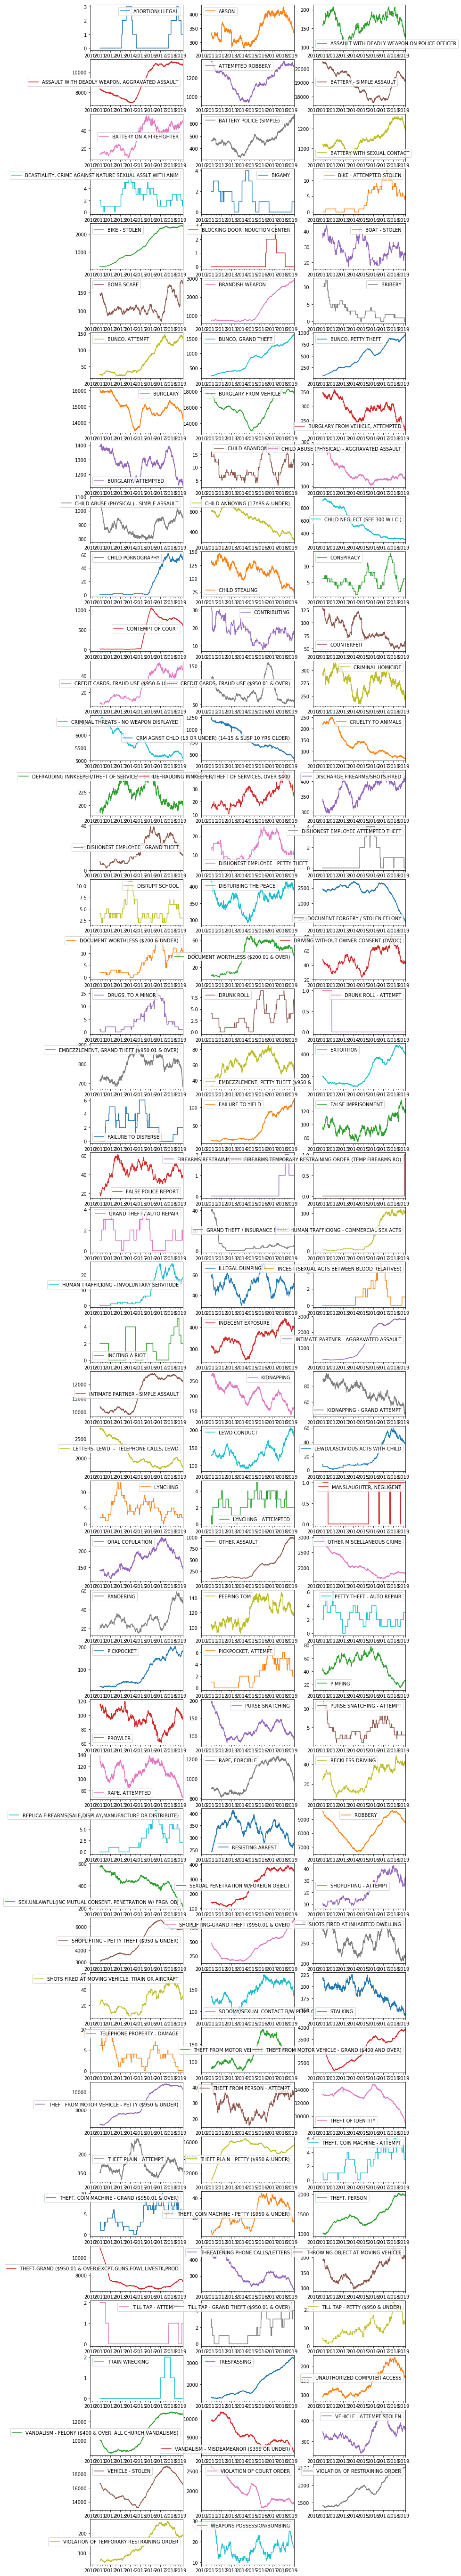

In [4]:
#透视图
df.index=pd.DatetimeIndex(df['Date Occurred'])
crime_count_date=df.pivot_table('Crime Code',aggfunc=np.size,columns='Crime Code Description',index=df.index.date,fill_value=0)
crime_count_date.index=pd.DatetimeIndex(crime_count_date.index)
plo=crime_count_date.rolling(365).sum().plot(figsize=(12,100),subplots=True,layout=(-1,3),sharex=False,sharey=False)